# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1208]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [1209]:
# %pip install --upgrade plotly

### Import Statements

In [1210]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
import iso3166
from datetime import datetime, timedelta

### Notebook Presentation

In [1211]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [1212]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [1213]:
print(df_data.shape)
print(df_data.columns)
df_data.head(5)

(4324, 9)
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [1214]:
df_data.count() #price has only 964 rows?

Unnamed: 0        4324
Unnamed: 0.1      4324
Organisation      4324
Location          4324
Date              4324
Detail            4324
Rocket_Status     4324
Price              964
Mission_Status    4324
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [1215]:
df_data.Date = pd.to_datetime(df_data.Date,utc=True)


In [1216]:
print(f"Any duplicated data: {df_data.duplicated().values.any()}")
print(f"Any isna value?: {df_data.isna().values.any()}")

Any duplicated data: False
Any isna value?: True


In [1217]:
print(df_data.isna().sum())

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


In [1218]:
col_subset = ["Organisation","Location","Date","Rocket_Status","Mission_Status"]
df_data.loc[df_data.Organisation.isna()][col_subset]

,Organisation,Location,Date,Rocket_Status,Mission_Status


## Descriptive Statistics

In [1219]:
df_data[col_subset].describe()

<ipython-input-1219-edc1e15231ca>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Organisation,Location,Date,Rocket_Status,Mission_Status
count,4324,4324,4324,4324,4324
unique,56,137,4319,2,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2008-11-05 00:15:00+00:00,StatusRetired,Success
freq,1777,235,2,3534,3879
first,NaN,NaN,1957-10-04 19:28:00+00:00,NaN,NaN
last,NaN,NaN,2020-08-07 05:12:00+00:00,NaN,NaN


In [1220]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      4324 non-null   int64              
 1   Unnamed: 0.1    4324 non-null   int64              
 2   Organisation    4324 non-null   object             
 3   Location        4324 non-null   object             
 4   Date            4324 non-null   datetime64[ns, UTC]
 5   Detail          4324 non-null   object             
 6   Rocket_Status   4324 non-null   object             
 7   Price           964 non-null    object             
 8   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 304.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [1221]:
count = df_data.Organisation.value_counts()

In [1222]:
fig = px.pie(df_data,
             labels=count.index,
             values=count.values,
             names=count.index,
             title="Number of Space missions Listed by Organisations"
             )
fig.update_traces(textposition='inside',textfont_size=15,textinfo='percent')

fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [1223]:
df_data.Rocket_Status.value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [1224]:
df_data.Mission_Status.value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [1225]:
df_data['Price'] = df_data['Price'].replace(',', '', regex=True).astype(float)
df_data.Price.max()
clean_data = df_data[['Price']].dropna()


Text(0.5, 0, 'Frequency')

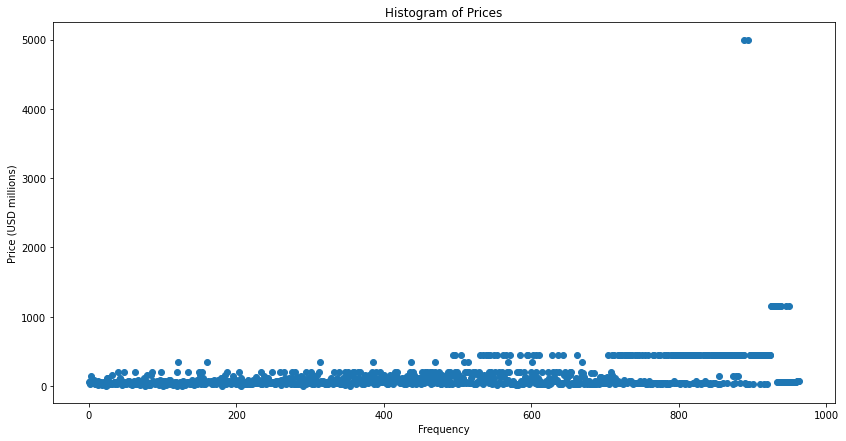

In [1226]:
plt.figure(figsize=(14,7))

plt.scatter(range(len(clean_data)), clean_data['Price'])

plt.title('Histogram of Prices')
plt.ylabel('Price (USD millions)')
plt.xlabel('Frequency')


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [1227]:
replacements = {
    "Russia": "Russian Federation",
    "New Mexico": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA"
}

for old_value, new_value in replacements.items():
    df_data.loc[df_data['Location'].str.contains(old_value), 'Location'] = new_value


In [1228]:
iso_codes = []

for i, row in df_data.iterrows():
    location_parts = row['Location'].split(', ')
    country = location_parts[-1]
    if country in iso3166.countries:
        alpha3_code = iso3166.countries.get(country).alpha3
        iso_codes.append(alpha3_code)
    else:
        iso_codes.append(None)

df_data['ISO'] = iso_codes

In [1229]:
df_success = df_data.query('Mission_Status == "Success"')

df_success_countries = df_success.groupby(['ISO'], 
                                  as_index=False).agg({'Mission_Status': pd.Series.count})
df_success_countries.sort_values('Mission_Status', ascending=False)


,ISO,Mission_Status
9,RUS,1305
10,USA,1188
6,KAZ,608
2,FRA,285
1,CHN,244
5,JPN,113
3,IND,63
8,NZL,11
4,ISR,9
7,KEN,9


In [1230]:
world_map = px.choropleth(df_success_countries,
                          locations='ISO',
                          color='Mission_Status', 
                          hover_name='ISO', 
                          color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True,)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [1231]:
df_fail = df_data.query('Mission_Status == "Partial Failure	" | Mission_Status == "Failure" | Mission_Status == "Prelaunch Failure"')


df_fail_countries = df_fail.groupby(['ISO'], 
                                  as_index=False).agg({'Mission_Status': pd.Series.count})
df_fail_countries.sort_values('Mission_Status', ascending=False)


,ISO,Mission_Status
10,USA,130
7,KAZ,73
9,RUS,63
2,CHN,19
3,FRA,13
6,JPN,10
4,IND,8
0,AUS,3
1,BRA,3
5,ISR,2


In [1232]:
world_map = px.choropleth(df_fail_countries,
                          locations='ISO',
                          color='Mission_Status', 
                          hover_name='ISO', 
                          color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True,)
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [1233]:
chart_data = df_data.groupby(by=['ISO', 
                                       'Mission_Status', 
                                       'Organisation'], as_index=False).agg({'Price': pd.Series.mean})
chart_data = chart_data.sort_values('Price', ascending=False)
chart_data

,ISO,Mission_Status,Organisation,Price
57,KAZ,Success,RVSN USSR,"5,000.00"
101,USA,Partial Failure,NASA,"1,160.00"
116,USA,Success,NASA,508.36
89,USA,Failure,NASA,450.00
97,USA,Partial Failure,Boeing,350.00
...,...,...,...,...
108,USA,Success,AMBA,NaN
109,USA,Success,Blue Origin,NaN
111,USA,Success,Douglas,NaN
112,USA,Success,General Dynamics,NaN


In [1234]:
burst=px.sunburst(chart_data,
                  path=['ISO','Mission_Status','Organisation'],values='Price',
                  title='Where do Discoveries Take Place?'
                  )
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [1235]:
df_totals = df_data.groupby(['Organisation', 'Mission_Status'], as_index=False).agg({'Price': pd.Series.sum})


In [1236]:
df_totals = df_totals.sort_values("Price",ascending=False)


In [1237]:
df_totals

,Organisation,Mission_Status,Price
76,NASA,Success,"74,220.00"
8,Arianespace,Success,"15,908.00"
104,ULA,Success,"14,689.00"
87,RVSN USSR,Success,"10,000.00"
17,CASC,Success,"6,053.15"
...,...,...,...
44,ISA,Prelaunch Failure,0.00
43,ISA,Failure,0.00
42,IRGC,Success,0.00
40,ILS,Partial Failure,0.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [1238]:
df_per_launch = df_data.groupby(['Organisation'], as_index=False).agg({'Price': pd.Series.mean})
df_per_launch = df_per_launch.sort_values("Price",ascending=False)
df_per_launch

,Organisation,Price
40,RVSN USSR,"5,000.00"
35,NASA,511.95
6,Boeing,177.29
3,Arianespace,170.26
48,ULA,151.00
19,ILS,101.54
32,MHI,95.47
34,Martin Marietta,80.16
49,US Air Force,59.65
24,JAXA,56.00


In [1239]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


# Chart the Number of Launches per Year

In [1240]:
df_data['Year'] = df_data['Date'].apply(lambda x: x.year)

df_launches = df_data.groupby('Year', as_index=False).agg({'Mission_Status': pd.Series.count})
df_launches = df_launches.sort_values("Year",ascending=False)

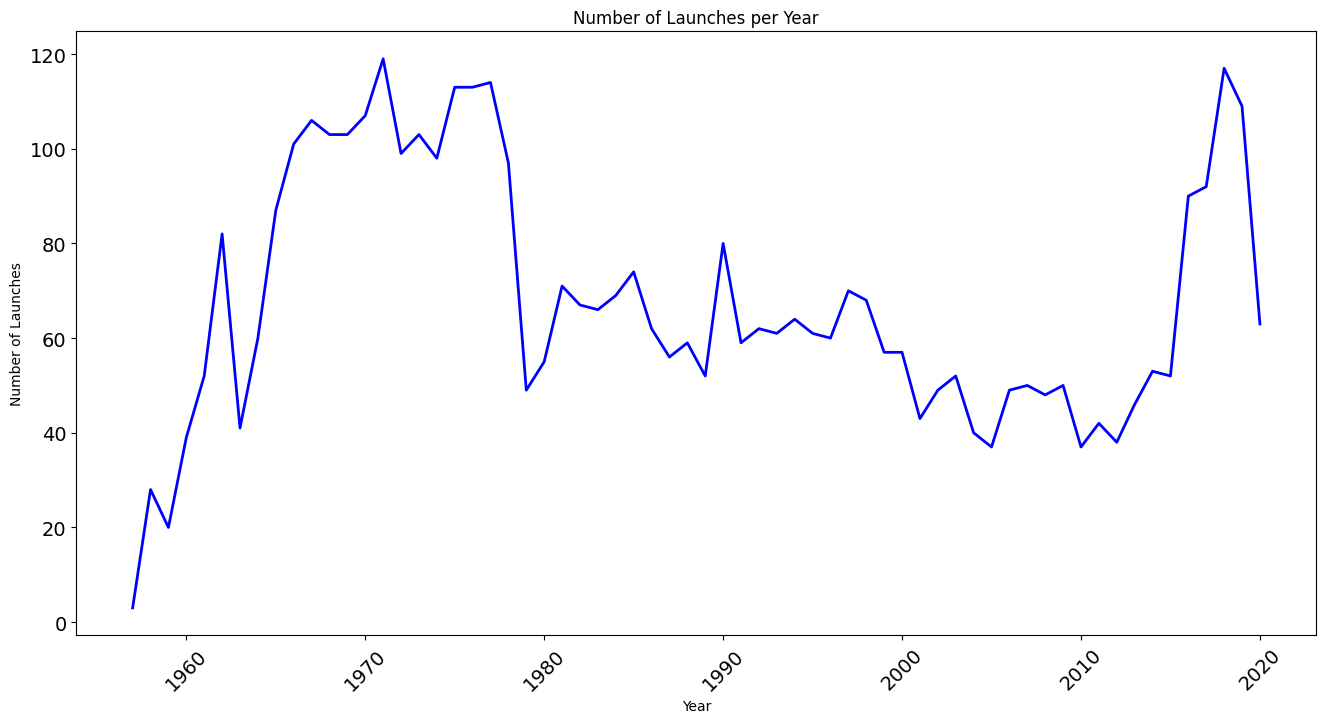

In [1241]:
plt.figure(figsize=(16,8), dpi=100)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, 
           rotation=45)
plt.plot(df_launches['Year'],df_launches['Mission_Status'],c='blue',linewidth=2)

plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [1242]:
df_data['Month'] = df_data['Date'].apply(lambda x: x.month)

df_per_month = df_data.groupby('Month', as_index=False).agg({'Mission_Status': pd.Series.count})
df_per_month = df_per_month.sort_values("Month",ascending=False)
df_per_month['Month']

11    12
10    11
9     10
8      9
7      8
6      7
5      6
4      5
3      4
2      3
1      2
0      1
Name: Month, dtype: int64

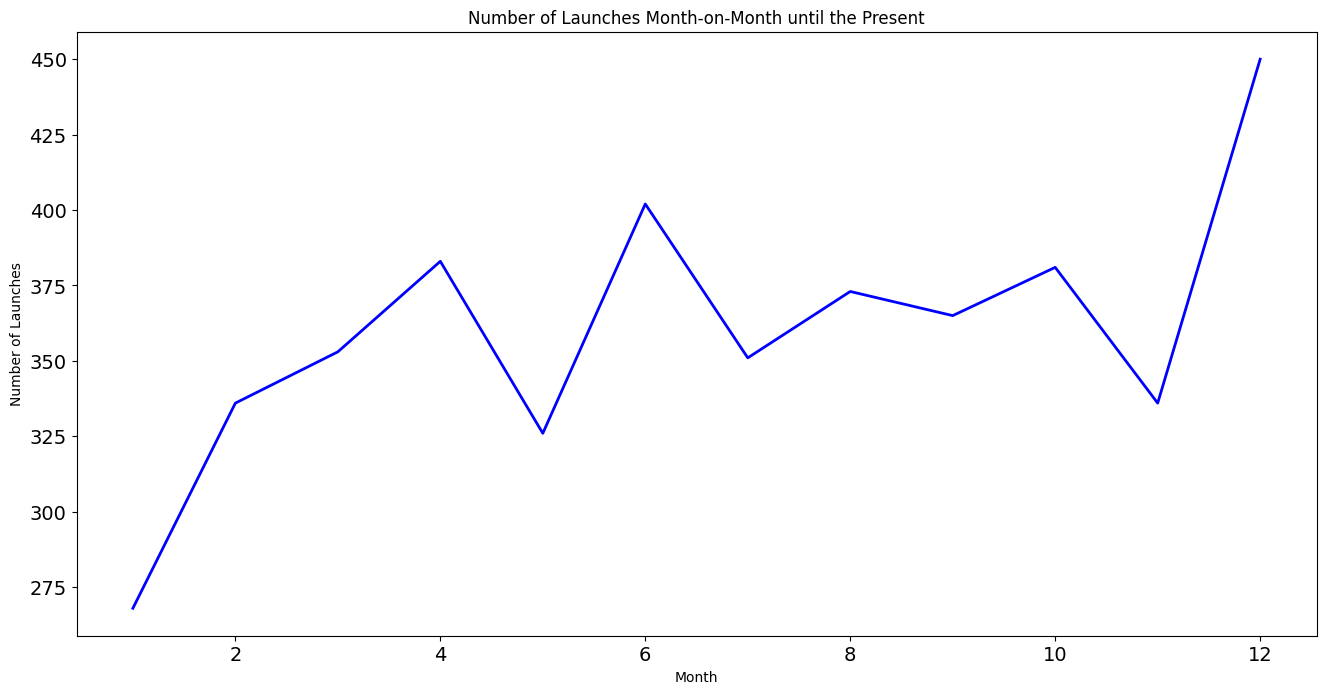

In [1243]:
plt.figure(figsize=(16,8), dpi=100)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.plot(df_per_month['Month'],df_per_month['Mission_Status'],c='blue',linewidth=2)

plt.title('Number of Launches Month-on-Month until the Present')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [1244]:
df_per_month

,Month,Mission_Status
11,12,450
10,11,336
9,10,381
8,9,365
7,8,373
6,7,351
5,6,402
4,5,326
3,4,383
2,3,353


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [1245]:
df_price_overtime = df_data.groupby(['Year'], as_index=False).agg({'Price': pd.Series.sum})
df_price_overtime

,Year,Price
0,1957,0.00
1,1958,0.00
2,1959,0.00
3,1960,0.00
4,1961,0.00
...,...,...
59,2016,"5,085.27"
60,2017,"4,586.41"
61,2018,"5,697.98"
62,2019,"4,351.51"


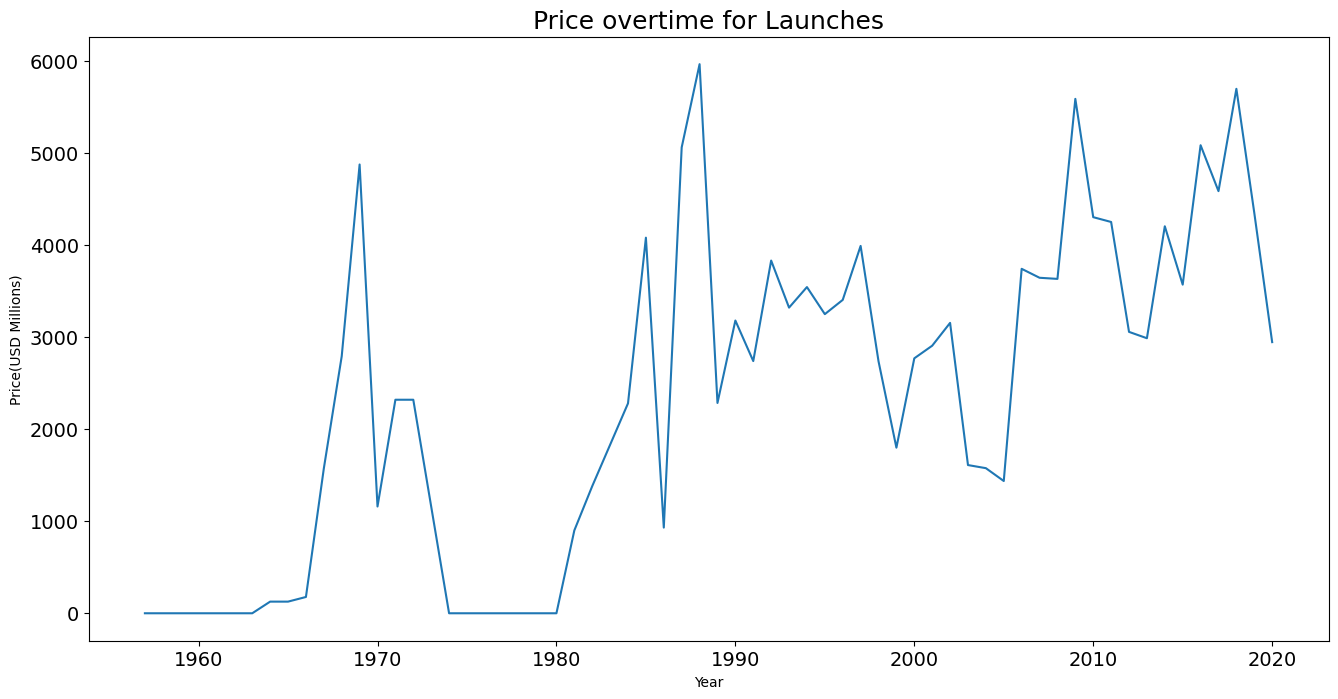

In [1246]:
plt.figure(figsize=(16,8), dpi=100)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.plot(df_price_overtime['Year'],df_price_overtime['Price'])


plt.title('Price overtime for Launches',fontsize=18)
plt.xlabel('Year')
plt.ylabel('Price(USD Millions)')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [1247]:
df_top_10 = df_data.groupby(['Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_top_10 = df_top_10.sort_values("Mission_Status",ascending=True)[-10:]
df_top_10

,Organisation,Mission_Status
34,Martin Marietta,114
6,Boeing,136
48,ULA,140
49,US Air Force,161
52,VKS RF,201
35,NASA,203
7,CASC,251
17,General Dynamics,251
3,Arianespace,279
40,RVSN USSR,1777


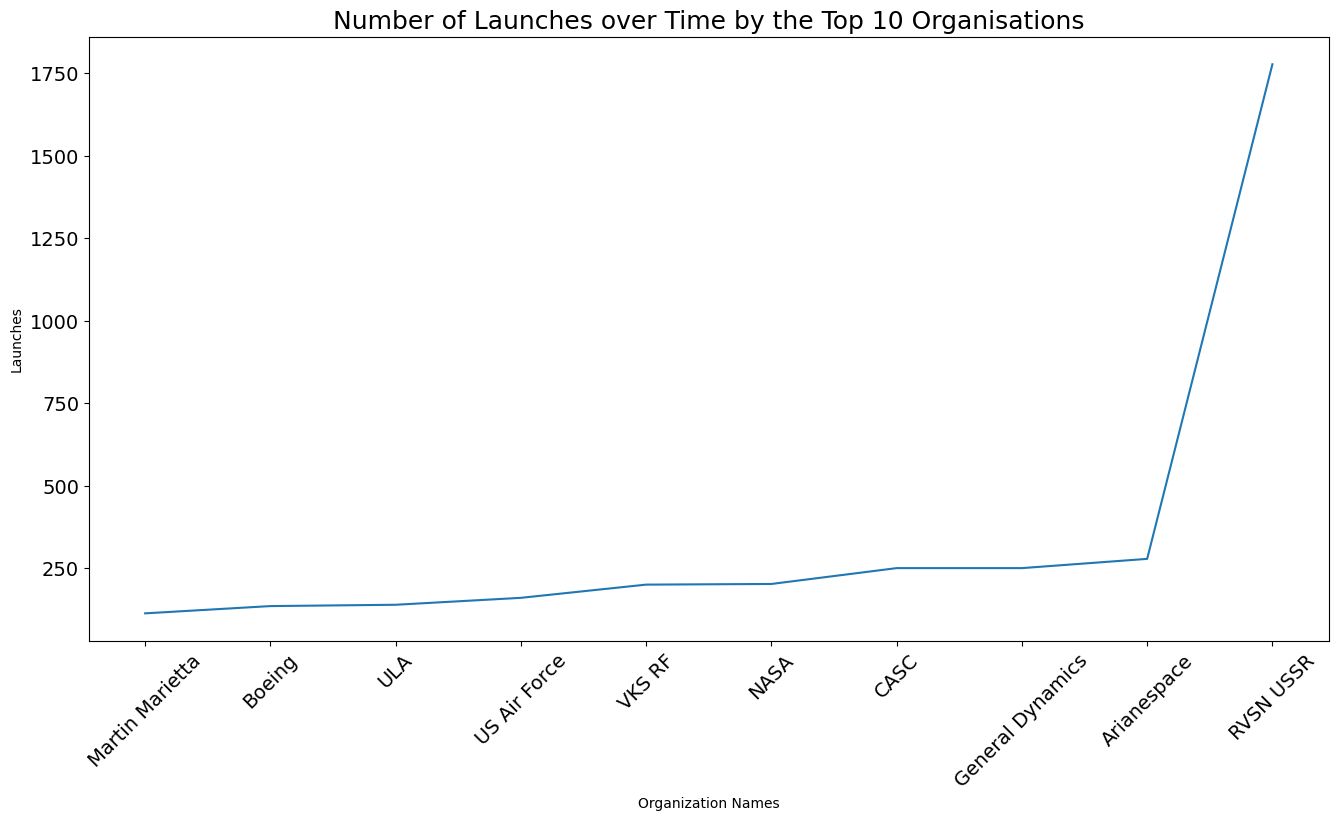

In [1248]:
plt.figure(figsize=(16,8), dpi=100)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,rotation=45)
plt.plot(df_top_10['Organisation'],df_top_10['Mission_Status'])


plt.title('Number of Launches over Time by the Top 10 Organisations',fontsize=18)
plt.xlabel('Organization Names')
plt.ylabel('Launches')
plt.show()

In [1249]:
df_data.sort_values('Year',ascending=True)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Year,Month
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,KAZ,1957,10
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,1957,11
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957,12
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958,2
4293,4293,4293,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18 23:02:00+00:00,SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,1958,12
...,...,...,...,...,...,...,...,...,...,...,...,...
35,35,35,IRGC,Iran,2020-04-22 03:59:00+00:00,Qased | Noor 1,StatusActive,NaN,Success,None,2020,4
34,34,34,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-04-22 19:30:00+00:00,Falcon 9 Block 5 | Starlink V1 L6,StatusActive,50.00,Success,USA,2020,4
33,33,33,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-04-25 01:51:00+00:00,Soyuz 2.1a | Progress MS-14,StatusActive,48.50,Success,KAZ,2020,4
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-05-12 01:16:00+00:00,Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success,CHN,2020,5


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [1250]:
start_date = '1951'
end_date = '1991'
mask = (df_data['Date'] > start_date) & (df_data['Date'] <= end_date)
df2 = df_data.loc[mask]
df2.head(5)


,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Year,Month
1776,1776,1776,RVSN USSR,Russian Federation,1990-12-22 07:28:00+00:00,Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,RUS,1990,12
1777,1777,1777,RVSN USSR,Russian Federation,1990-12-10 07:54:00+00:00,Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,RUS,1990,12
1778,1778,1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",1990-12-04 00:48:00+00:00,Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,KAZ,1990,12
1779,1779,1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1990-12-02 06:49:00+00:00,Space Shuttle Columbia | STS-35,StatusRetired,450.00,Success,USA,1990,12
1780,1780,1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1990-12-01 15:57:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,USA,1990,12


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [1251]:
df_launches = df_data.groupby('ISO', as_index=False).agg({'Organisation': pd.Series.count})
df_launches['ISO'] = df_launches['ISO'].apply(lambda x: 'RUS+KAZ' if x in ['RUS', 'KAZ'] else x)
df_launches = df_launches[df_launches['ISO'].isin(['USA', 'RUS+KAZ'])]
df_launches

,ISO,Organisation
7,RUS+KAZ,701
10,RUS+KAZ,1398
11,USA,1351


In [1252]:
fig = px.pie(df_launches, values='Organisation', names='ISO')
fig.update_layout(title='Number of Launches by USA AND USSR')
fig.show()


[bağlantı metni](https://)## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [1253]:
df_launches = df_data.groupby(['ISO','Year'], as_index=False).agg({'Organisation': pd.Series.count})
df_launches['ISO'] = df_launches['ISO'].apply(lambda x: 'RUS+KAZ' if x in ['RUS', 'KAZ'] else x)
df_launches = df_launches[df_launches['ISO'].isin(['USA', 'RUS+KAZ'])]
df_launches = df_launches.sort_values('Year',ascending=True)
df_launches

,ISO,Year,Organisation
199,RUS+KAZ,1957,2
333,USA,1957,1
200,RUS+KAZ,1958,5
334,USA,1958,23
335,USA,1959,16
...,...,...,...
395,USA,2019,27
331,RUS+KAZ,2019,9
261,RUS+KAZ,2020,6
332,RUS+KAZ,2020,3


In [1254]:
fig = px.line(df_launches, x='Year', y='Organisation', color='ISO')
fig.update_layout(title='Number of Launches by Year',xaxis_title="Year",yaxis_title="Number of Launches")


fig.show()

## Chart the Total Number of Mission Failures Year on Year.

1.   Liste öğesi
2.   Liste öğesi



In [1255]:
df_fail = df_data.query('Mission_Status == "Partial Failure	" | Mission_Status == "Failure" | Mission_Status == "Prelaunch Failure"')


df_fail_year = df_fail.groupby(['Year'], 
                                  as_index=False).agg({'Mission_Status': pd.Series.count})
df_fail_year.sort_values('Mission_Status', ascending=False)


,Year,Mission_Status
1,1958,20
3,1960,20
4,1961,17
12,1969,17
5,1962,15
...,...,...
31,1988,1
27,1984,1
26,1983,1
21,1978,1


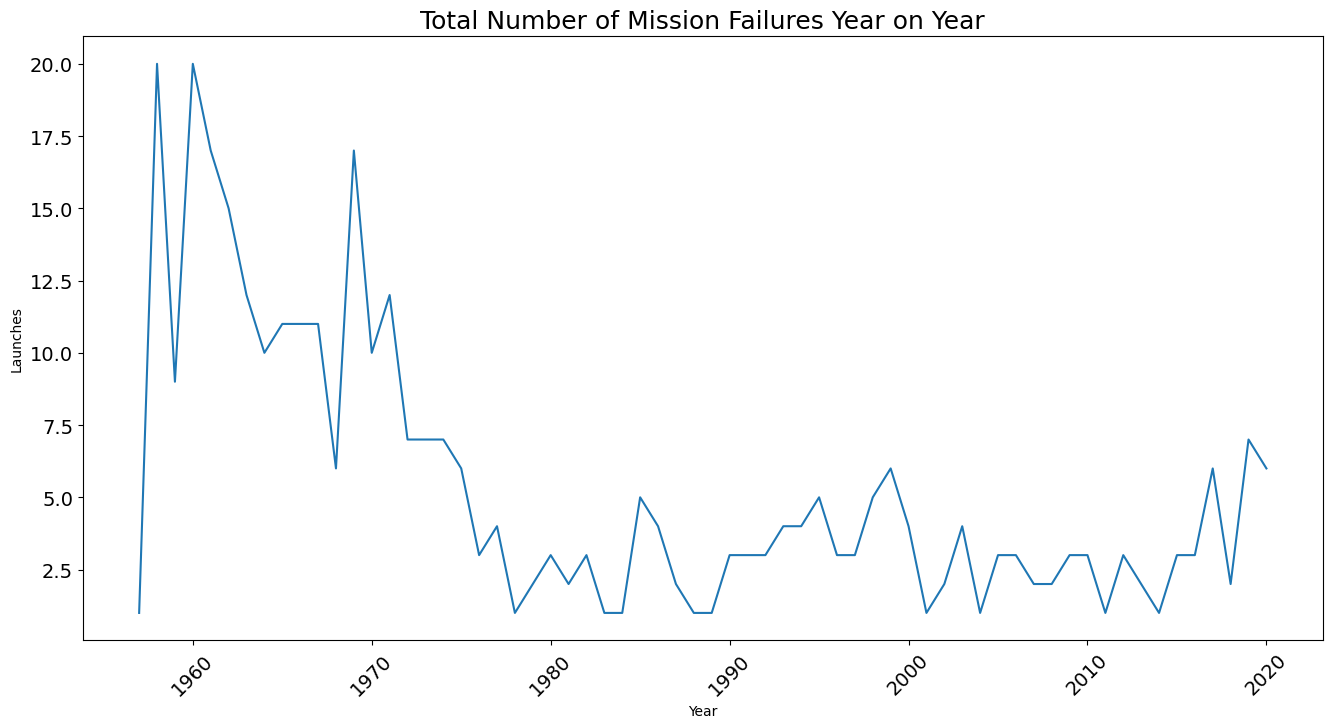

In [1256]:
plt.figure(figsize=(16,8), dpi=100)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,rotation=45)
plt.plot(df_fail_year['Year'],df_fail_year['Mission_Status'])


plt.title('Total Number of Mission Failures Year on Year',fontsize=18)
plt.xlabel('Year')
plt.ylabel('Launches')
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [1257]:
df_failures = df_data.groupby(['Year', 'Mission_Status'], as_index=False).agg({'Organisation': pd.Series.count})
df_failures = df_failures.query('Mission_Status == "Partial Failure	" | Mission_Status == "Failure" | Mission_Status == "Prelaunch Failure"')
df_failures

,Year,Mission_Status,Organisation
0,1957,Failure,1
2,1958,Failure,20
5,1959,Failure,9
8,1960,Failure,20
10,1961,Failure,17
...,...,...,...
166,2017,Failure,6
169,2018,Failure,2
172,2019,Failure,6
174,2019,Prelaunch Failure,1


In [1258]:
df_totals = df_data.groupby(['Year'], as_index=False).agg({'Organisation': pd.Series.count})
df_totals

,Year,Organisation
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


In [1259]:
df_merged = pd.merge(df_failures,df_totals,on='Year')
df_merged['Failure Percentage'] = df_merged['Organisation_x']/df_merged['Organisation_y']*100
df_merged['Failure Percentage']

0    33.33
1    71.43
2    45.00
3    51.28
4    32.69
      ... 
63    6.52
64    1.71
65    5.50
66    0.92
67    9.52
Name: Failure Percentage, Length: 68, dtype: float64

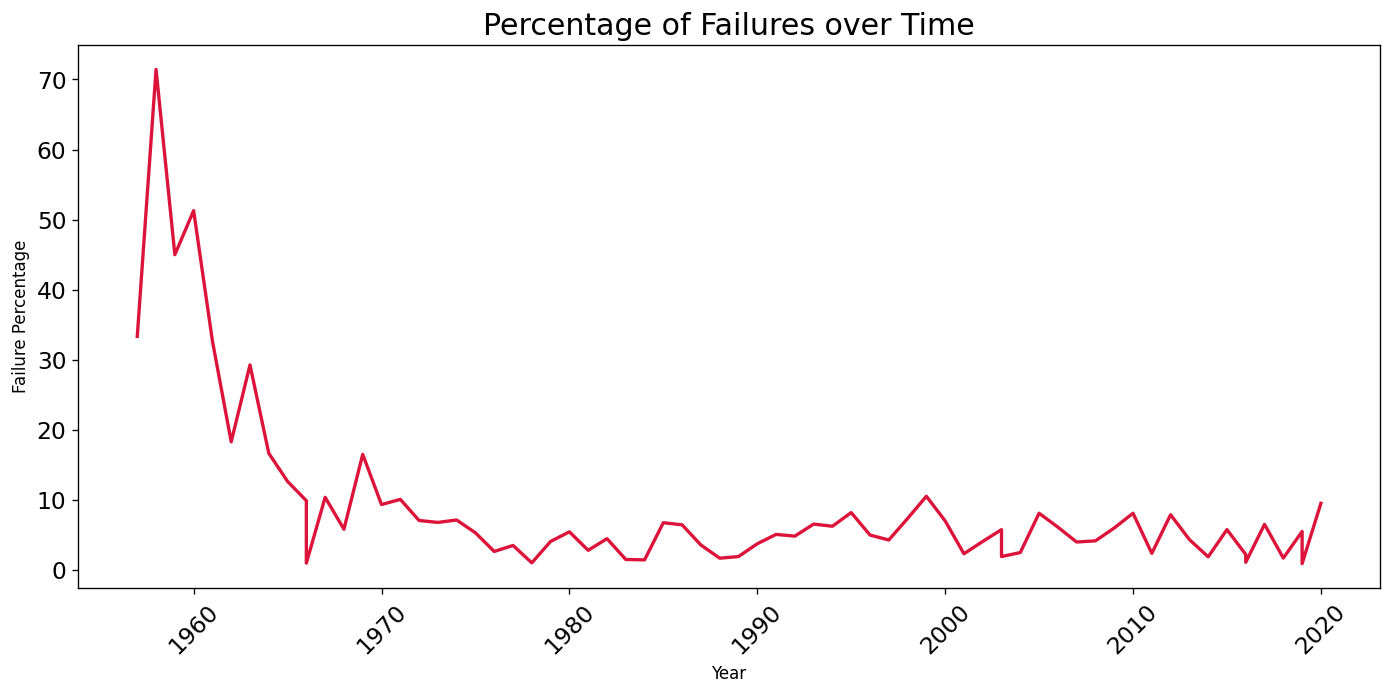

In [1260]:
plt.figure(figsize=(14,6),dpi=120)
plt.plot(df_merged['Year'],df_merged['Failure Percentage'],color='crimson',linewidth=2)
plt.xlabel('Year')
plt.ylabel('Failure Percentage')
plt.title('Percentage of Failures over Time',fontsize=18)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [1293]:
df_launches = df_data.groupby(['Year', 'ISO'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_max_launches = df_launches.groupby('Year', as_index=False).agg({'Mission_Status': 'max'})
df_merged = pd.merge(df_launches, df_max_launches, on=['Year', 'Mission_Status'])


<Figure size 1440x720 with 0 Axes>

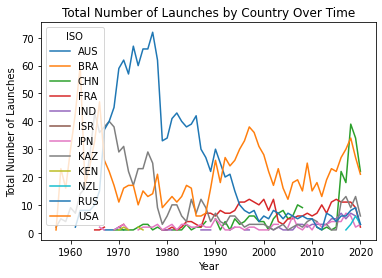

In [1376]:
pivot_table = df_data.pivot_table(index='Year', columns='ISO', values='Mission_Status', aggfunc='count')
plt.figure(figsize=(12, 6),dpi=120)
pivot_table.plot(kind='line')

plt.title('Total Number of Launches by Country Over Time')
plt.xlabel('Year')
plt.ylabel('Total Number of Launches')

plt.show()


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [1357]:
df_launches = df_data.groupby(['Year', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})

df_max_launches = df_launches.groupby('Year', as_index=False).agg({'Mission_Status': 'max'})

df_merged = pd.merge(df_launches, df_max_launches, on=['Year', 'Mission_Status'])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

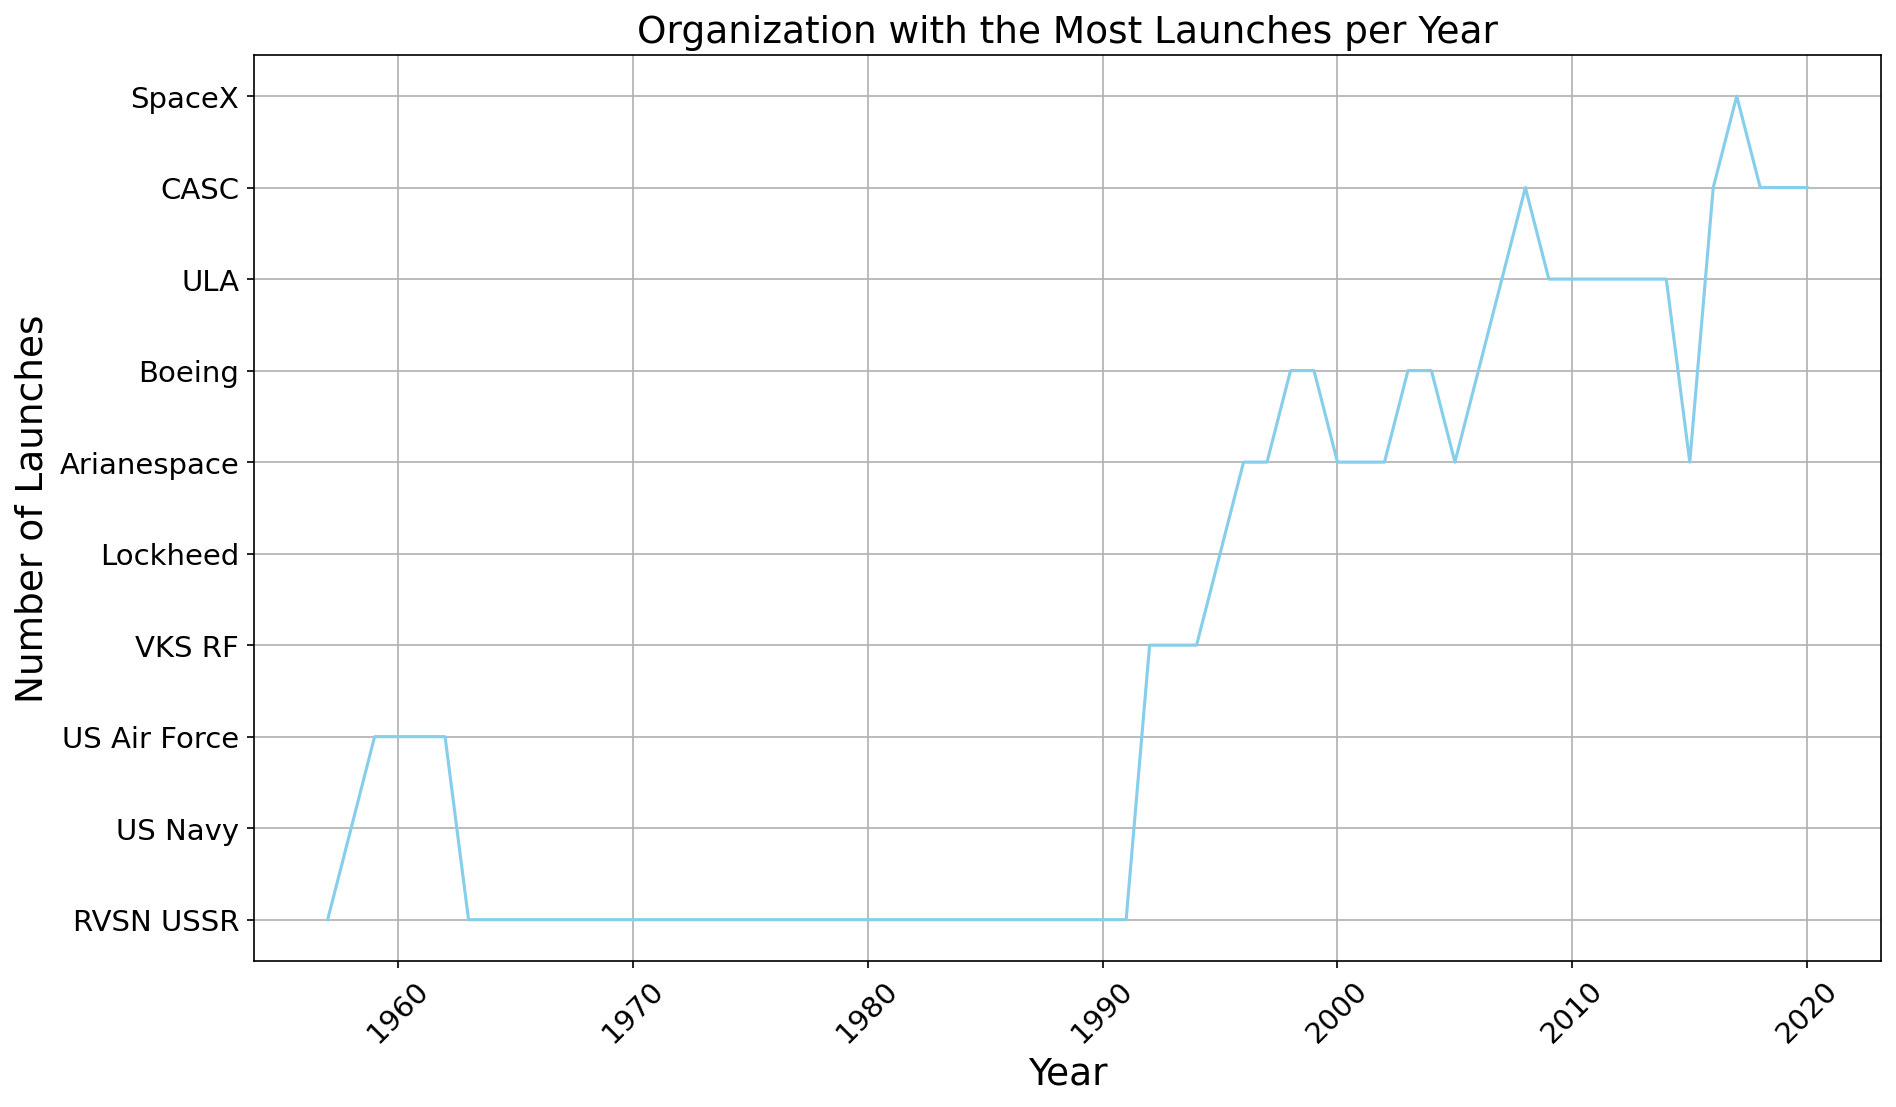

In [1377]:
df_pivot = df_data.pivot_table(index='Year', columns='Organisation', values='Mission_Status', aggfunc='count')
df_max_launches = df_pivot.idxmax(axis=1)
# Set up the figure
plt.figure(figsize=(14,8),dpi=150)

# Plot the data
plt.plot(df_max_launches.index, df_max_launches.values, color='skyblue')

# Set the labels and title for the figure
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Launches', fontsize=18)
plt.title('Organization with the Most Launches per Year', fontsize=18)
plt.grid(True)
# Set the tick label font size
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
